# **Model Tuning and Comparison**

## Objectives

* To apply hyperparameter tuning to help improve predictive performance.
* To Compare baseline and tuned model metrics.

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Nod-to-the-COD/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Nod-to-the-COD'

# Load data and Imports

Load Data

In [4]:
import joblib

X_train = joblib.load("outputs/data_split/X_train.pkl")
X_test = joblib.load("outputs/data_split/X_test.pkl")
y_train = joblib.load("outputs/data_split/y_train.pkl")
y_test = joblib.load("outputs/data_split/y_test.pkl")


Import Libraries

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---

# Train Baseline Models

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    })

pd.DataFrame(results)


,Model,MAE,RMSE,R2
0,Linear Regression,75.489085,96.062927,0.500535
1,Random Forest,50.301028,73.547832,0.707226


# Hyperparameter Tuning (Random Forest)

In [9]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

tuned_results = {
    "Model": "Tuned Random Forest",
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
}

pd.DataFrame([tuned_results])


,Model,MAE,RMSE,R2
0,Tuned Random Forest,49.73226,72.277368,0.717253


# Comparison of Models

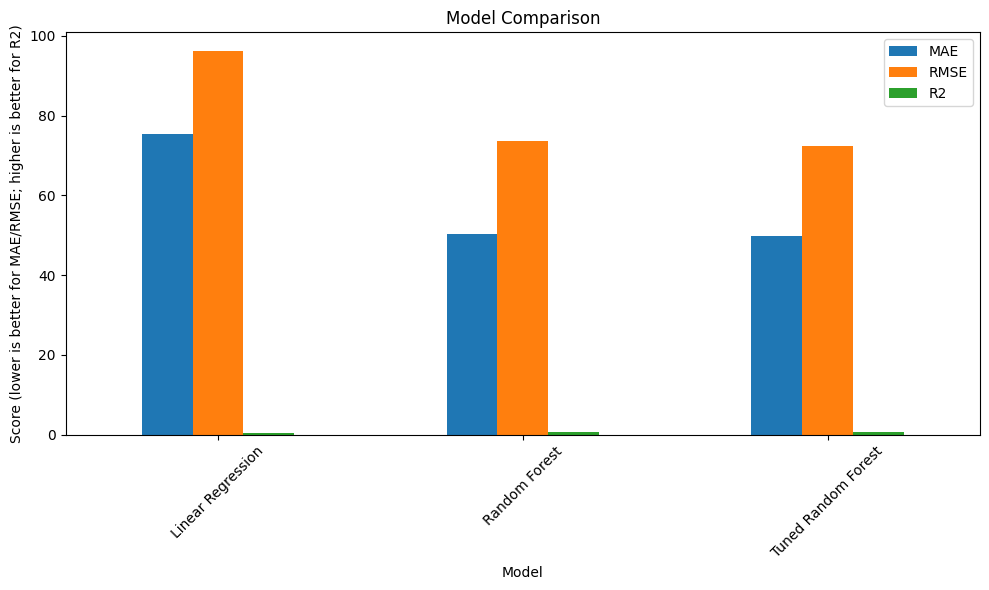

In [10]:
all_results = results + [tuned_results]
df_results = pd.DataFrame(all_results)

df_results.set_index("Model").plot.bar(figsize=(10, 6), title="Model Comparison")
plt.ylabel("Score (lower is better for MAE/RMSE; higher is better for R2)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Save best model

In [11]:
joblib.dump(best_model, "outputs/models/final_model_tuned.pkl")


['outputs/models/final_model_tuned.pkl']

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
